# Librerias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from lazypredict.Supervised import LazyClassifier

%matplotlib inline

# Importacion de los datos

In [2]:
path = r'data/train_data/data estructurada/Brain Tumor.csv'
data = pd.read_csv(path)
data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.54,619.59,24.89,0.11,4.28,18.90,98.61,0.29,0.09,0.53,4.47,0.98,0.00
1,Image2,0,8.75,805.96,28.39,0.27,3.72,14.46,63.86,0.48,0.23,0.65,3.22,0.99,0.00
2,Image3,1,7.34,1143.81,33.82,0.00,5.06,26.48,81.87,0.03,0.00,0.27,5.98,0.98,0.00
3,Image4,1,5.96,959.71,30.98,0.00,5.68,33.43,151.23,0.03,0.00,0.24,7.70,0.96,0.00
4,Image5,0,7.32,729.54,27.01,0.15,4.28,19.08,174.99,0.34,0.12,0.50,6.83,0.97,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.23,1208.85,34.77,0.06,2.08,4.65,158.44,0.22,0.05,0.49,5.21,0.95,0.00
3758,Image3759,0,20.44,1227.15,35.03,0.07,2.14,4.88,161.16,0.23,0.05,0.50,5.08,0.95,0.00
3759,Image3760,0,18.01,1151.58,33.93,0.07,2.31,5.58,167.13,0.23,0.05,0.49,5.10,0.95,0.00
3760,Image3761,0,13.33,945.73,30.75,0.09,2.73,7.76,223.81,0.26,0.07,0.48,6.44,0.94,0.00


# 1. Analisis de la data

In [3]:
# Formato de los datos
data.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [4]:
print("Cantidad de datos:", data.shape)

Cantidad de datos: (3762, 15)


In [5]:
print("Tipos de datos:\n")
data.info()

Tipos de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
me

In [6]:
#pd.set_option('display.width',100)
#pd.set_option('precision',4)
print("Estadisticas:")
data.describe()

Estadisticas:


,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00,3762.00
mean,0.45,9.49,711.10,25.18,0.07,4.10,24.39,127.96,0.20,0.06,0.48,4.70,0.96,0.00
std,0.50,5.73,467.47,8.77,0.07,2.56,56.43,109.50,0.13,0.06,0.13,1.85,0.03,0.00
min,0.00,0.08,3.15,1.77,0.00,1.89,3.94,3.19,0.02,0.00,0.11,0.68,0.55,0.00
25%,0.00,4.98,363.23,19.06,0.01,2.62,7.25,72.13,0.07,0.00,0.36,3.41,0.95,0.00
50%,0.00,8.48,622.58,24.95,0.07,3.42,12.36,106.74,0.23,0.05,0.51,4.48,0.96,0.00
75%,1.00,13.21,966.95,31.10,0.11,4.65,22.64,161.06,0.30,0.09,0.58,5.72,0.97,0.00
max,1.00,33.24,2910.58,53.95,0.39,36.93,1371.64,3382.57,0.59,0.35,0.81,27.83,0.99,0.00


In [7]:
# Datos nulos
data.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [8]:
print("Distribucion del Target de la data:\n")
print(data.groupby('Class').size())

Distribucion del Target de la data:

Class
0    2079
1    1683
dtype: int64


In [9]:
correlation = data.corr(method='pearson')
correlation

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Class,1.00,-0.10,0.31,0.29,-0.78,0.40,0.24,0.21,-0.86,-0.76,-0.85,0.56,-0.11,NaN
Mean,-0.10,1.00,0.78,0.79,-0.10,-0.60,-0.36,-0.05,-0.01,-0.11,0.10,-0.11,0.29,NaN
Variance,0.31,0.78,1.00,0.98,-0.34,-0.35,-0.25,0.14,-0.34,-0.34,-0.29,0.24,0.29,NaN
Standard Deviation,0.29,0.79,0.98,1.00,-0.35,-0.43,-0.33,0.12,-0.33,-0.34,-0.29,0.22,0.35,NaN
Entropy,-0.78,-0.10,-0.34,-0.35,1.00,-0.22,-0.14,-0.14,0.97,1.00,0.85,-0.50,0.12,NaN
Skewness,0.40,-0.60,-0.35,-0.43,-0.22,1.00,0.90,0.35,-0.30,-0.21,-0.47,0.51,-0.57,NaN
Kurtosis,0.24,-0.36,-0.25,-0.33,-0.14,0.90,1.00,0.30,-0.17,-0.13,-0.31,0.38,-0.59,NaN
Contrast,0.21,-0.05,0.14,0.12,-0.14,0.35,0.30,1.00,-0.13,-0.14,-0.27,0.76,-0.43,NaN
Energy,-0.86,-0.01,-0.34,-0.33,0.97,-0.30,-0.17,-0.13,1.00,0.96,0.92,-0.55,0.12,NaN
ASM,-0.76,-0.11,-0.34,-0.34,1.00,-0.21,-0.13,-0.14,0.96,1.00,0.84,-0.49,0.12,NaN


In [10]:
# Sesgo de la distribucion de cada atributo
data.skew()

Class                 0.21
Mean                  0.77
Variance              1.07
Standard Deviation    0.18
Entropy               0.95
Skewness              4.33
Kurtosis             11.31
Contrast             10.25
Energy                0.19
ASM                   1.10
Homogeneity          -0.29
Dissimilarity         1.95
Correlation          -4.75
Coarseness            0.00
dtype: float64

## 1.1. Visualizacion de los datos

In [11]:
# Se elimina algunas columnas
data = data.drop(["Image", "Coarseness"], axis=1)
# Nombres de los atributos y el target
nombres = ['Class','Mean','Variance','Standard Deviation','Entropy','Skewness','Kurtosis','Contrast','Energy',
           'ASM','Homogeneity','Dissimilarity','Correlation']
# Se mueve la clase a la ultima columna
nombres = nombres[1:] + nombres[:1]
data = data[nombres]
data

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Class
0,6.54,619.59,24.89,0.11,4.28,18.90,98.61,0.29,0.09,0.53,4.47,0.98,0
1,8.75,805.96,28.39,0.27,3.72,14.46,63.86,0.48,0.23,0.65,3.22,0.99,0
2,7.34,1143.81,33.82,0.00,5.06,26.48,81.87,0.03,0.00,0.27,5.98,0.98,1
3,5.96,959.71,30.98,0.00,5.68,33.43,151.23,0.03,0.00,0.24,7.70,0.96,1
4,7.32,729.54,27.01,0.15,4.28,19.08,174.99,0.34,0.12,0.50,6.83,0.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.23,1208.85,34.77,0.06,2.08,4.65,158.44,0.22,0.05,0.49,5.21,0.95,0
3758,20.44,1227.15,35.03,0.07,2.14,4.88,161.16,0.23,0.05,0.50,5.08,0.95,0
3759,18.01,1151.58,33.93,0.07,2.31,5.58,167.13,0.23,0.05,0.49,5.10,0.95,0
3760,13.33,945.73,30.75,0.09,2.73,7.76,223.81,0.26,0.07,0.48,6.44,0.94,0


 ### 1.1.1. Histogramas

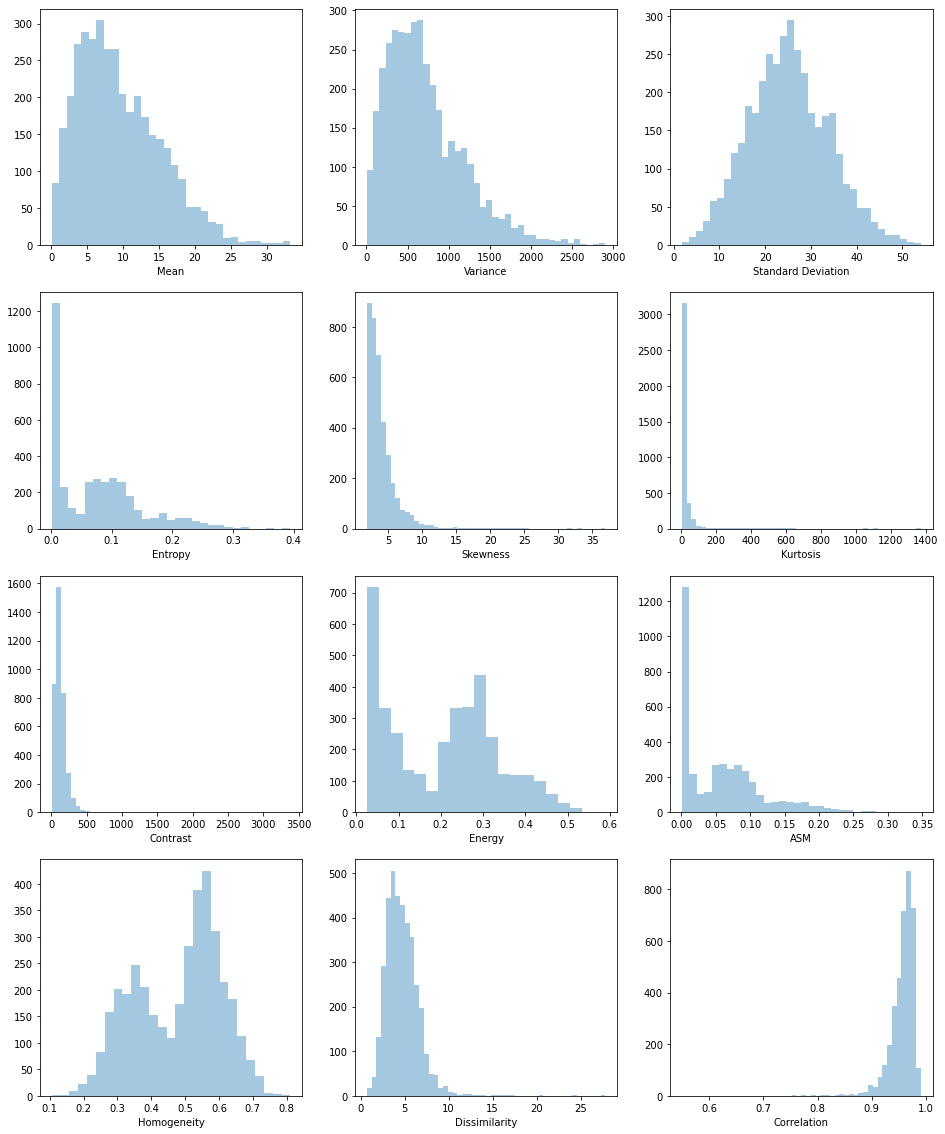

In [12]:
f, axes = plt.subplots(4, 3, figsize = (16,20), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        if n>12: break
        sns.distplot(data[nombres[n]], ax = axes[i,j], kde = False)
        n+=1
plt.show()

### 1.1.2. Boxplots

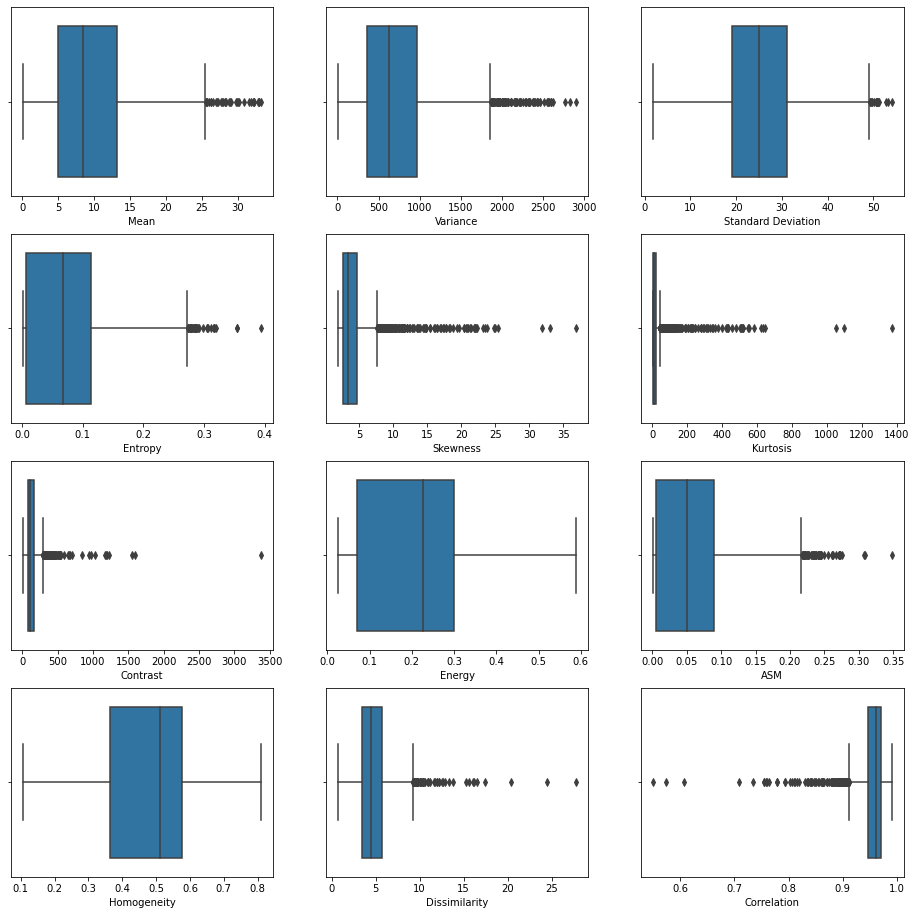

In [13]:
f, axes = plt.subplots(4, 3, figsize = (16,16), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        if n>12: break
        sns.boxplot(data[nombres[n]], ax = axes[i,j])
        n+=1
plt.show()

## 1.2. Matriz de correlacion

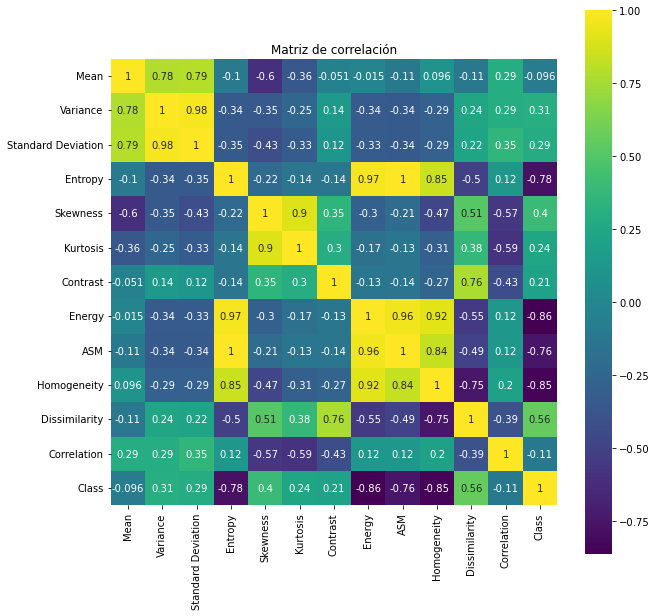

In [14]:
correlation = data.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Matriz de correlación')
plt.show()

## 1.3. Matriz de dispersion

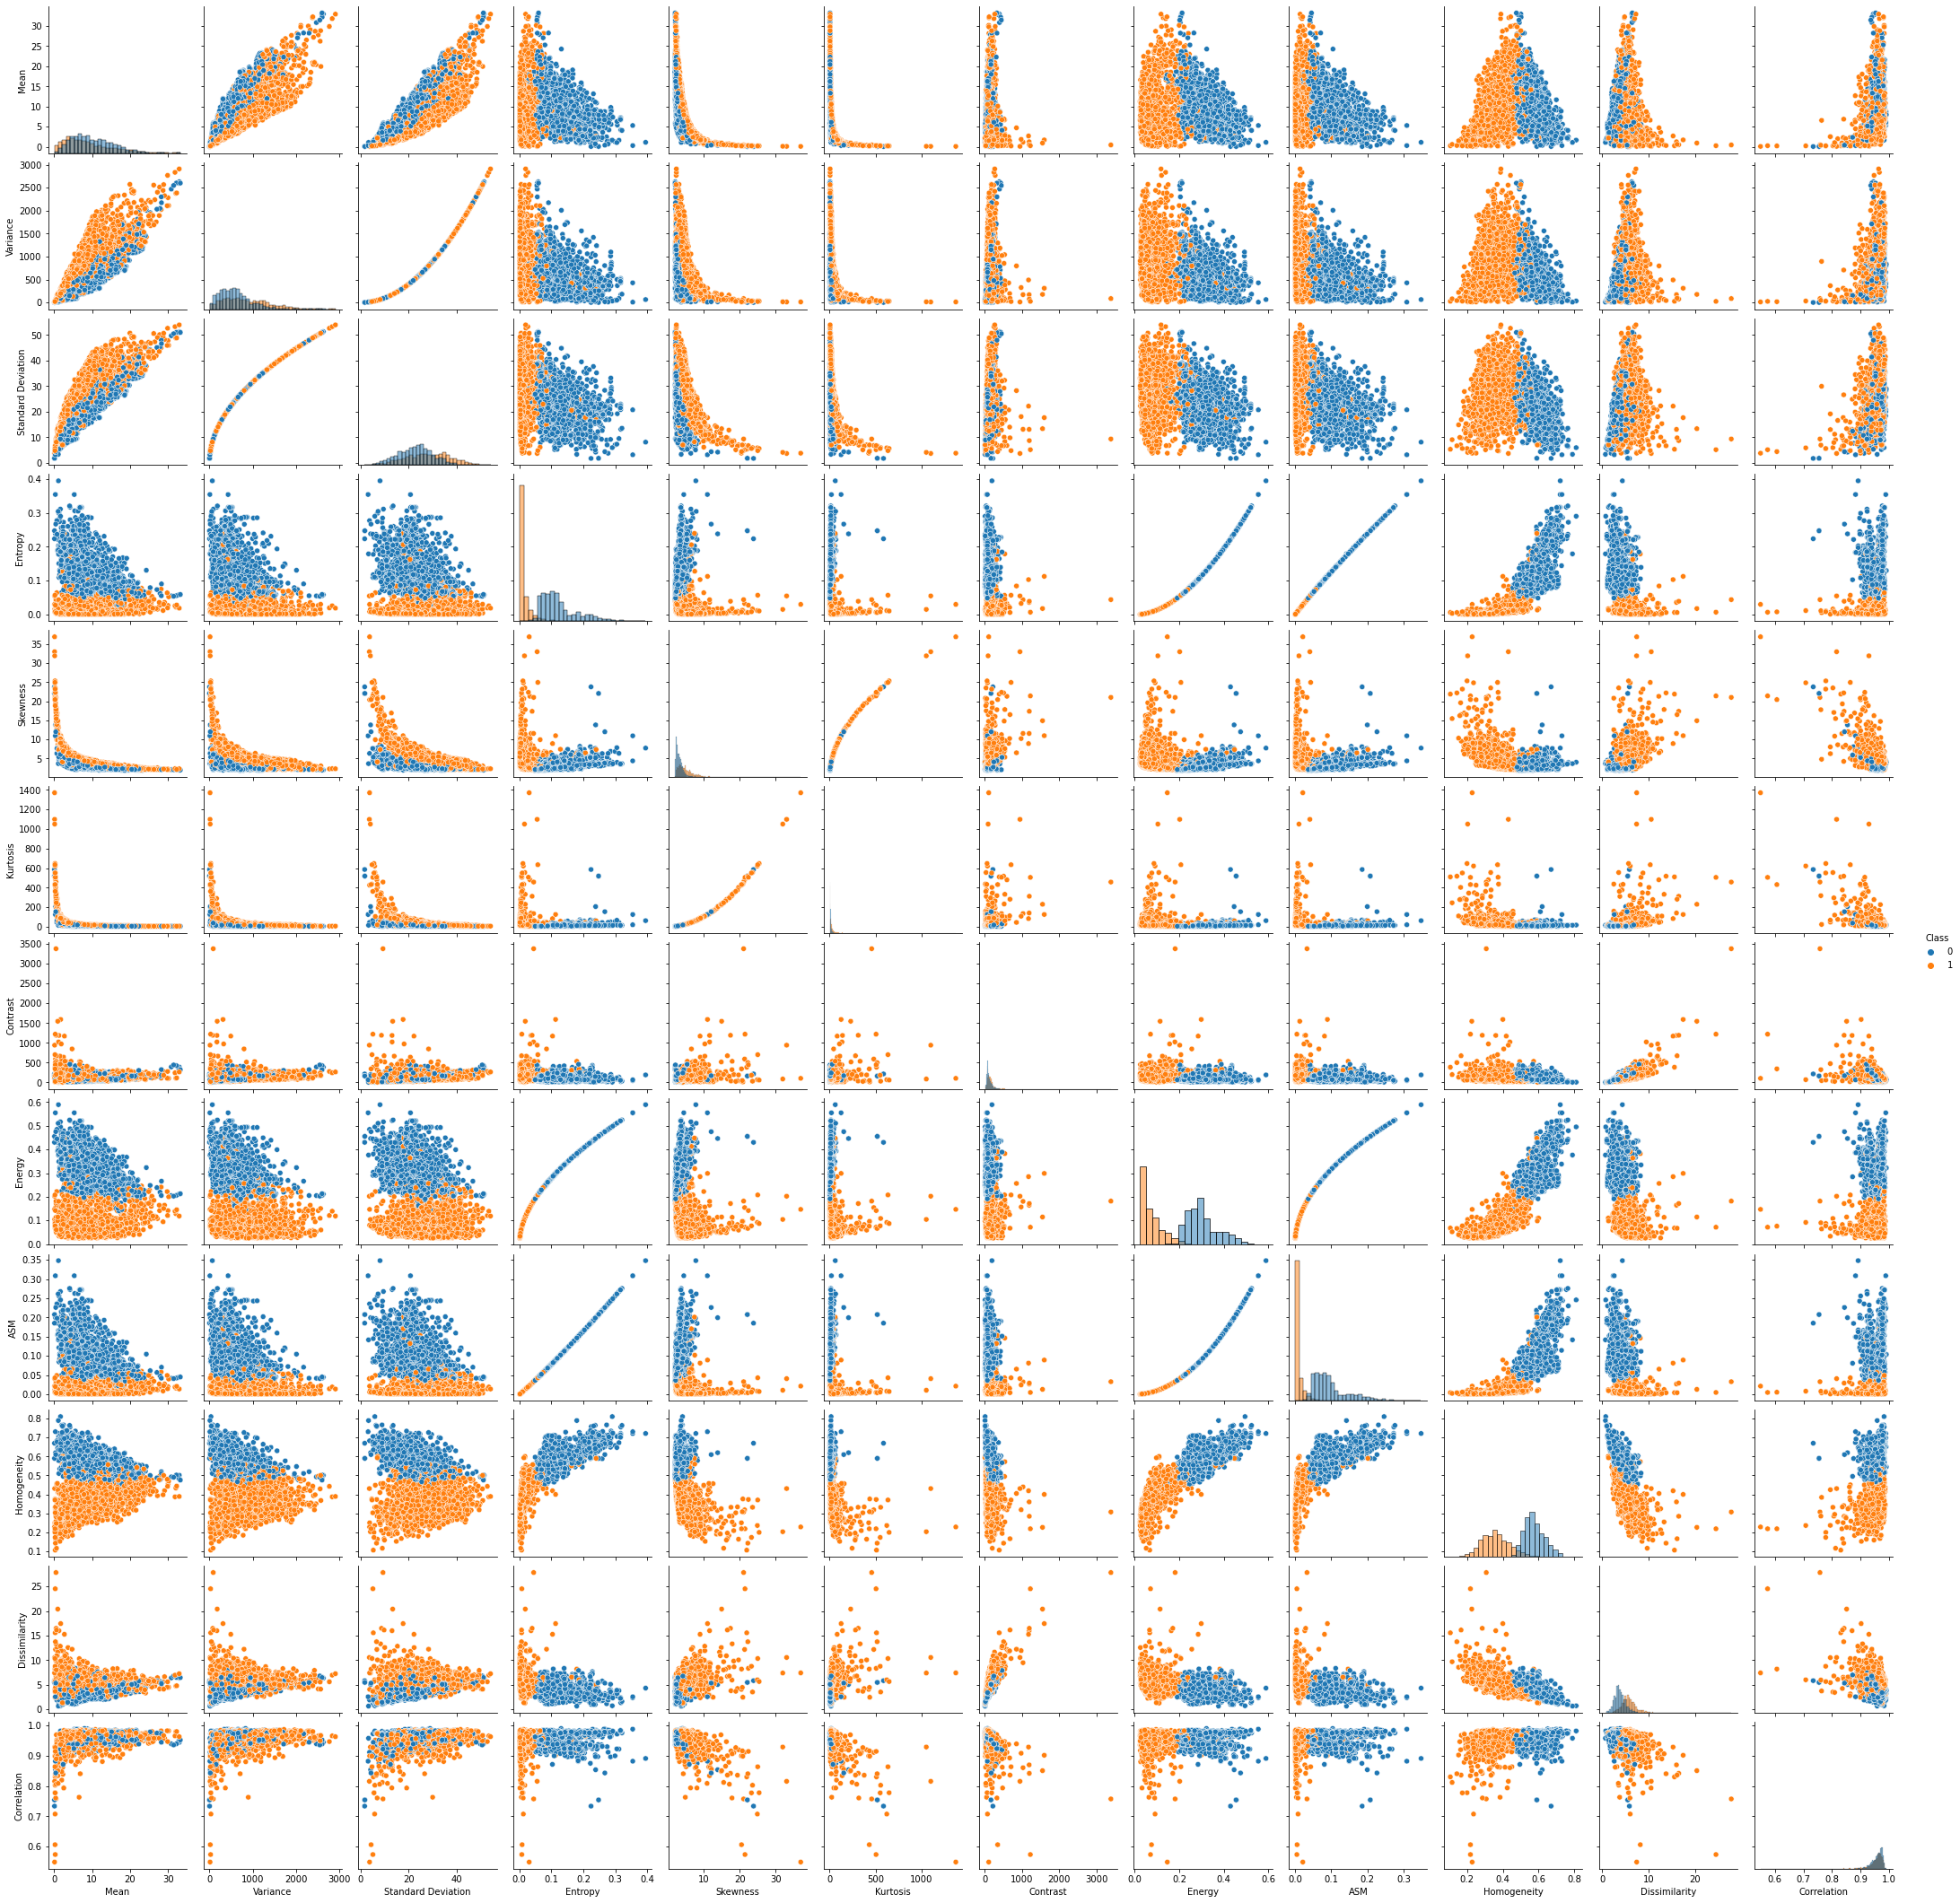

In [15]:
sns.pairplot(data, hue="Class", diag_kind="hist")
plt.show()

## 1.4. Boxplots por clase

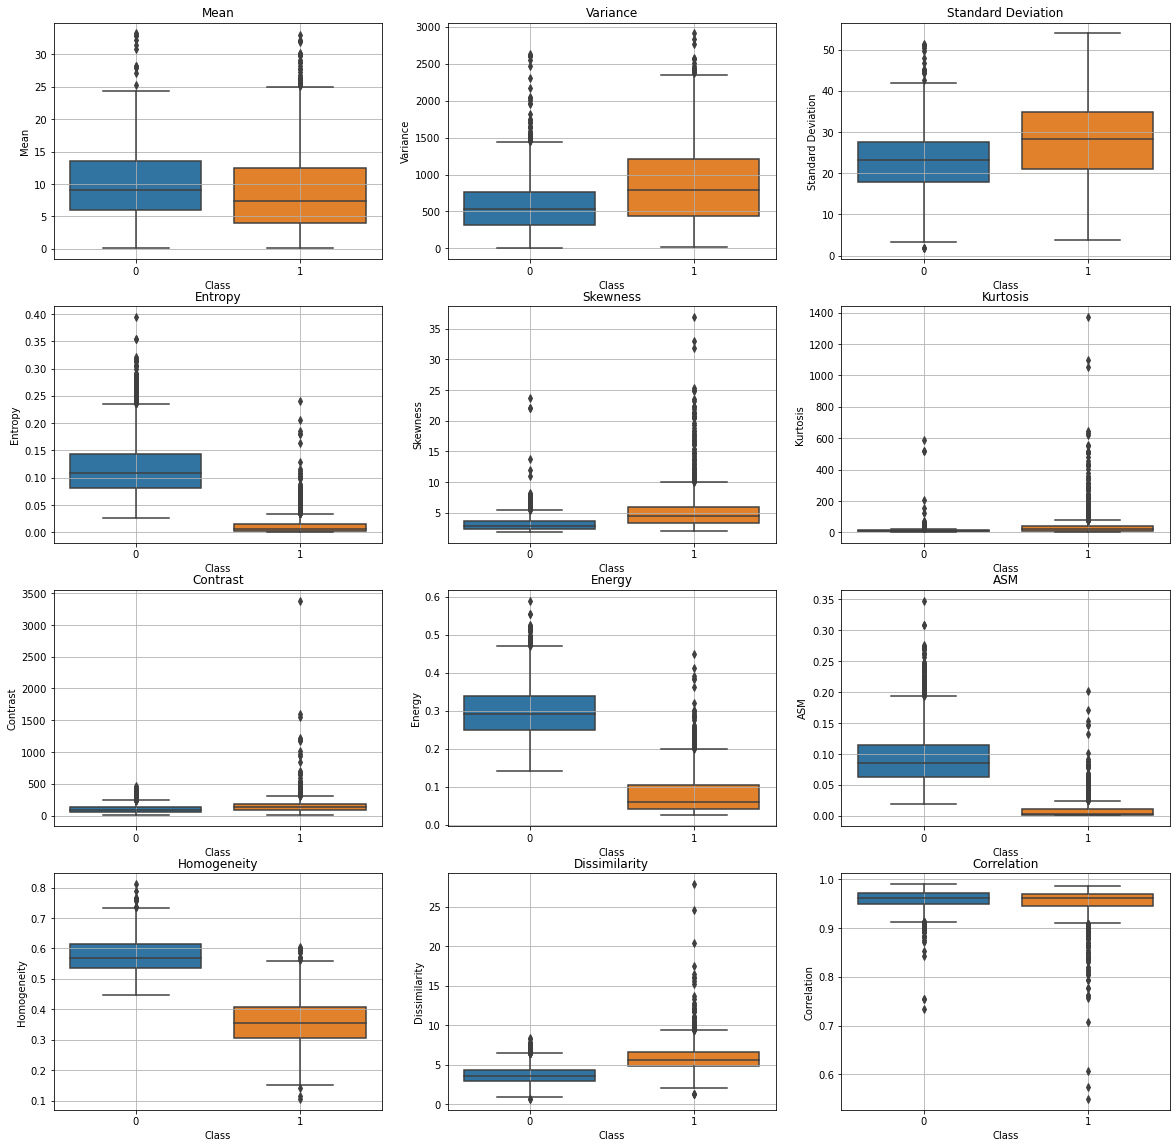

In [16]:
f, axes = plt.subplots(4, 3, figsize = (20,20), squeeze=True)

for i in range(1,13): 
    plt.subplot(4,3,i)
    sns.boxplot(x='Class', y=nombres[i-1], data=data)
    plt.title(nombres[i-1])
    plt.grid(True)

## 1.5. Imagenes de las tomografias

In [17]:
# Se guardan las imagenes en un array
x_image = np.zeros([3762,240,240,3], dtype = np.uint8)

for i in range(1,3763): # 3762 imagenes
    x_image[i-1] = cv2.imread('data/train_data/data no estructurada/Image{}.jpg'.format(i))
    
y_image = np.array(data['Class'], dtype = np.uint8)

print("Formato del dato x_image: {} {}".format(x_image.shape, x_image.dtype))
print("Formato del dato y_image: {} {}".format(y_image.shape, y_image.dtype))

Formato del dato x_image: (3762, 240, 240, 3) uint8
Formato del dato y_image: (3762,) uint8


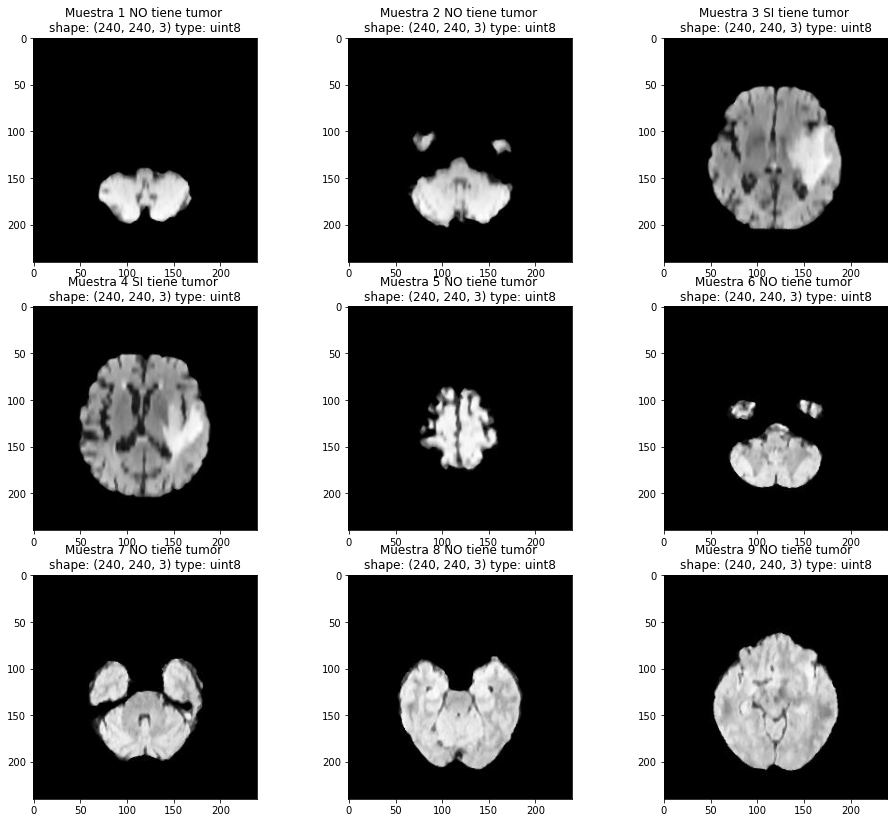

In [18]:
# Se muestran las N primeras muestras (N = m*n)
m = 3 # Numero de filas
n = 3 # Numero de columnas
f, axs = plt.subplots(m, n, figsize = (16,14), squeeze=False)

N=0
for i in range(0,m):
    for j in range(0,n):
        N += 1 
        axs[i,j].imshow(x_image[N-1])
        if y_image[N-1] == 1:
            txt = 'SI tiene tumor'
        else:
            txt = 'NO tiene tumor'
            
        axs[i,j].set_title("Muestra {} {} \nshape: {} type: {}".format(N ,txt , x_image[N-1].shape, x_image[N-1].dtype))

plt.show()

# 2. Preprocesamiento de la data

In [19]:
path = r'data/train_data/data estructurada/Brain Tumor.csv'
data = pd.read_csv(path)

data = data.drop(['Image','Coarseness'], axis=1)
# Nombres de los atributos y el target
nombres = ['Class','Mean','Variance','Standard Deviation','Entropy','Skewness','Kurtosis','Contrast','Energy',
           'ASM','Homogeneity','Dissimilarity','Correlation']
# Se mueve la clase a la ultima columna
nombres = nombres[1:] + nombres[:1]
data = data[nombres]
data

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Class
0,6.54,619.59,24.89,0.11,4.28,18.90,98.61,0.29,0.09,0.53,4.47,0.98,0
1,8.75,805.96,28.39,0.27,3.72,14.46,63.86,0.48,0.23,0.65,3.22,0.99,0
2,7.34,1143.81,33.82,0.00,5.06,26.48,81.87,0.03,0.00,0.27,5.98,0.98,1
3,5.96,959.71,30.98,0.00,5.68,33.43,151.23,0.03,0.00,0.24,7.70,0.96,1
4,7.32,729.54,27.01,0.15,4.28,19.08,174.99,0.34,0.12,0.50,6.83,0.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.23,1208.85,34.77,0.06,2.08,4.65,158.44,0.22,0.05,0.49,5.21,0.95,0
3758,20.44,1227.15,35.03,0.07,2.14,4.88,161.16,0.23,0.05,0.50,5.08,0.95,0
3759,18.01,1151.58,33.93,0.07,2.31,5.58,167.13,0.23,0.05,0.49,5.10,0.95,0
3760,13.33,945.73,30.75,0.09,2.73,7.76,223.81,0.26,0.07,0.48,6.44,0.94,0


In [20]:
# Se separan las caracteristicas y el Target
X = np.array(data.drop(['Class'],1))
y = np.array(data['Class'])

## 2.1. Tecnicas de feature selection

## 2.1.1. Características altamente correlacionadas

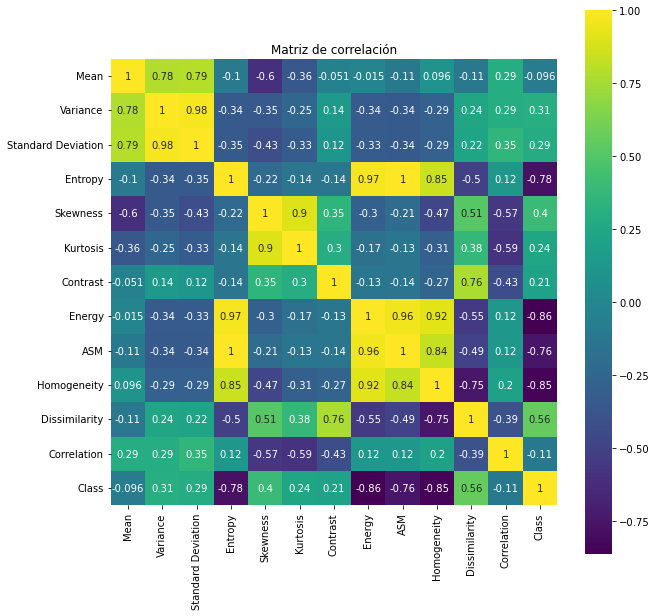

In [21]:
correlation = data.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Matriz de correlación')
plt.show()

In [22]:
# Creacion de la matriz de correlacion
corr_matrix = data.drop(['Class'],1).corr().abs()
# Seleccion del triángulo superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
# Se encuentra el índice de columnas de características con una correlación superior a 0.95
to_drop = [column for column in upper.columns if any(upper[column]>0.75)]
to_drop

['Variance',
 'Standard Deviation',
 'Kurtosis',
 'Energy',
 'ASM',
 'Homogeneity',
 'Dissimilarity']

## 2.1.2. Eliminación hacia atras (Backward Selection)

In [23]:
import statsmodels.api as sm
# Se agrega una columna constante de unos, obligatoria para el modelo sm.OLS
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1).fit()
model.pvalues

array([7.06932906e-001, 4.34098476e-021, 5.02223277e-022, 7.65574928e-007,
       6.01339674e-136, 7.74719663e-005, 7.56895045e-002, 3.28184929e-038,
       5.19091137e-009, 2.81228942e-151, 1.25303859e-004, 1.69860565e-020,
       9.08347476e-017])

## 2.1.3. Selección univariable

In [24]:
# Librerias
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Extracción de características
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# Resumen de puntucaciones
print(list(data.columns))
print(fit.scores_)
features = fit.transform(X)
# Resumen de características seleccionadas
print(features[0:5,:])

['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Class']
[1.19175027e+02 1.10224889e+05 9.37512645e+02 1.52789748e+02
 9.74702926e+02 2.82526862e+04 1.59350226e+04 2.28638330e+02
 1.25355815e+02 9.22543404e+01 8.48039657e+02 3.17534480e-02]
[[ 619.58784457    4.27647703   18.90057479   98.61397059]
 [ 805.957634      3.71811563   14.46461754   63.85881588]
 [1143.80821918    5.06175041   26.47956316   81.86720593]
 [ 959.71198491    5.67797741   33.42884534  151.22974102]
 [ 729.54057898    4.28322091   19.07910829  174.98875598]]


## 2.1.4. Eliminación recursiva de características

In [25]:
# Librerias
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Extracción de características
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print(list(data.columns))
print(f"Numero de Caracteristicas: {fit.n_features_}")
print(f"Caracteristicas Seleccionadas: {fit.support_}")
print(f"Ranking de Caracteristicas: {fit.ranking_}")

['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Class']
Numero de Caracteristicas: 5
Caracteristicas Seleccionadas: [False False False  True False False False  True  True  True False  True]
Ranking de Caracteristicas: [6 7 4 1 2 5 8 1 1 1 3 1]


## 2.2 Tecnicas de Feature Importance

## 2.2.1. Decision Trees

In [26]:
# Librerias
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

# Genera la partición
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Aprendizaje el modelo
depth = 8
algoritmo = DecisionTreeRegressor(criterion='mse', max_depth=depth)
algoritmo.fit(X_train, Y_train)

# Extracción los índices de las variables utilizadas
subset = np.unique(algoritmo.tree_.feature[algoritmo.tree_.feature >= 6])
print(f"Variables: {X.shape[1]}")
print(f"Variables utilizadas: {subset}")
print(f"Training: {algoritmo.score(X_train, Y_train).round(2)}")
print(f"Test: {algoritmo.score(X_test, Y_test).round(2)}")
print(data.columns[6], data.columns[7], data.columns[9])
#tree.plot_tree(algoritmo)

Variables: 12
Variables utilizadas: [ 6  7  9 10 11]
Training: 0.98
Test: 0.92
Contrast Energy Homogeneity


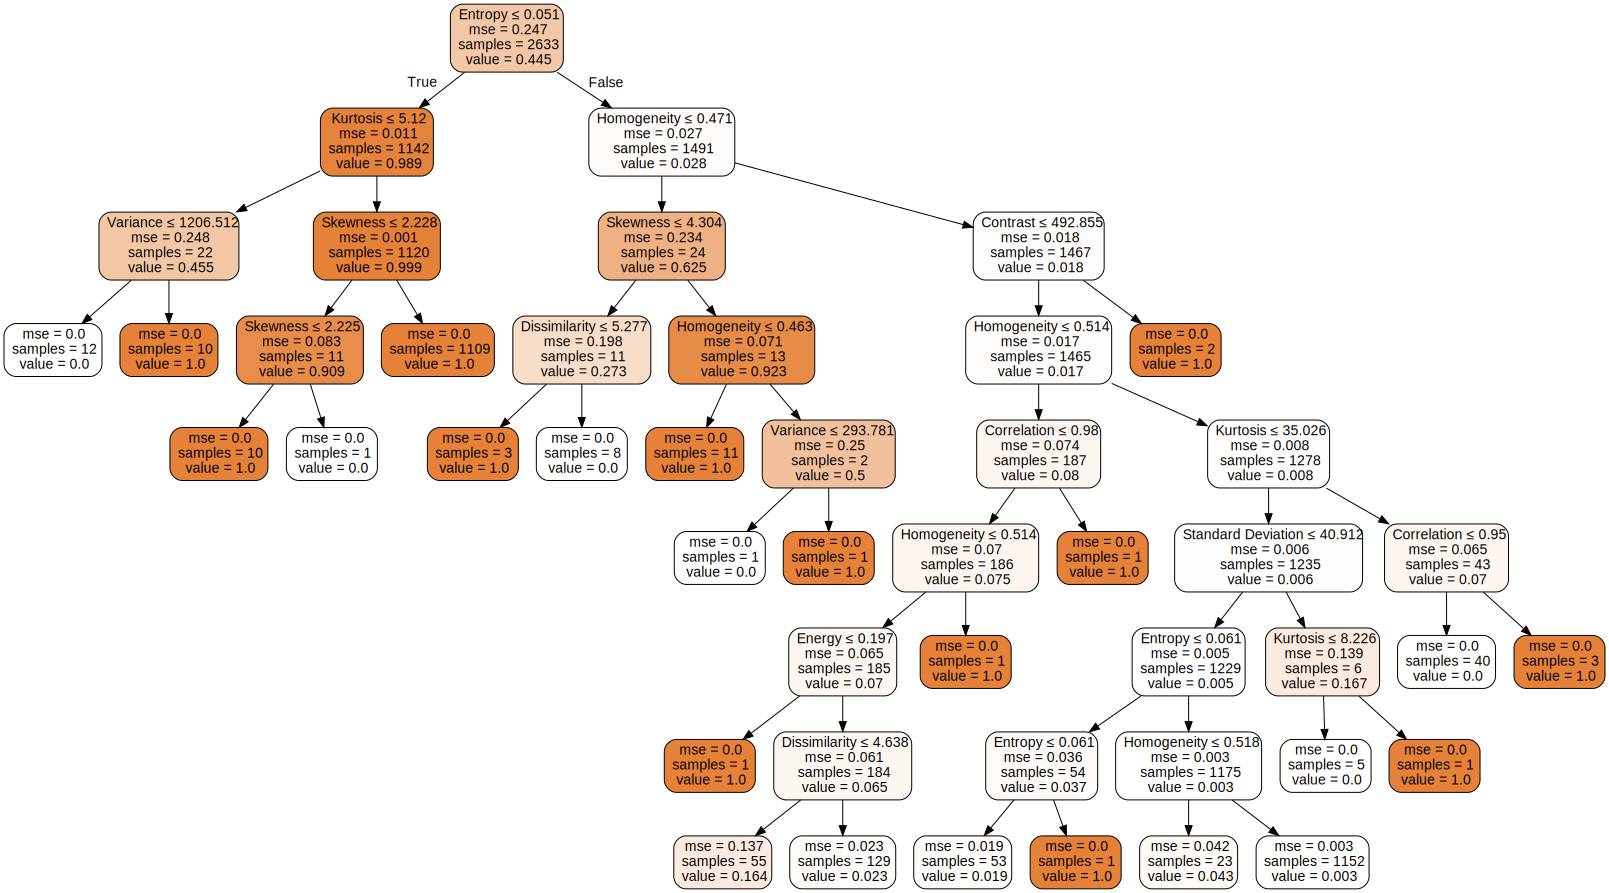

In [27]:
from sklearn import tree
import graphviz 
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(algoritmo, out_file=None, 
                      feature_names=nombres[:-1],  
                      class_names=nombres[-1],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## 2.2.2 Extra Trees

In [28]:
# Librerias
from sklearn.ensemble import ExtraTreesClassifier
# Extracción de caracteristicas
model = ExtraTreesClassifier()
model.fit(X, y)
print(list(data.columns))
print(model.feature_importances_)

['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Class']
[0.01480609 0.02246491 0.01932707 0.19137547 0.03790038 0.02427465
 0.00888623 0.2647254  0.17203602 0.20609233 0.03042121 0.00769024]


## 2.2.3. Random Forest

In [29]:
# Librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Genera la partición
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Entrenamos al algoritmo
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)
# Extrae las importancias
importances = forest.feature_importances_
Y_pred = forest.predict(X_test)
print(f"Precision (con todas las variables): {accuracy_score(Y_test, Y_pred)}")

Precision (con todas las variables): 0.9798711755233495


In [30]:
# Extrae los índices ordenados de menor a mayor
ranking = np.argsort(forest.feature_importances_)
print(data.columns[ranking])

Index(['Correlation', 'Mean', 'Contrast', 'Standard Deviation', 'Variance',
       'Skewness', 'Kurtosis', 'Dissimilarity', 'Homogeneity', 'ASM',
       'Entropy', 'Energy'],
      dtype='object')


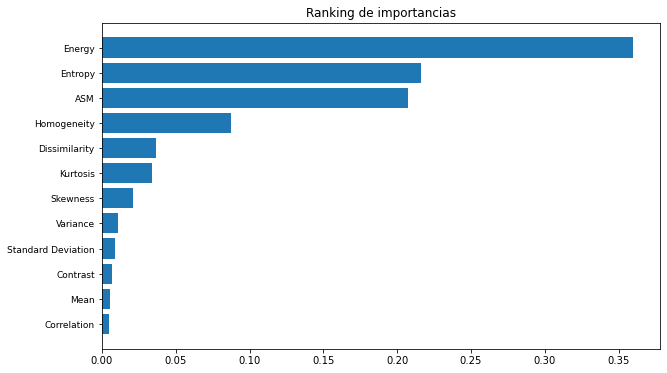

In [31]:
plt.figure(figsize=(10,6))
plt.title("Ranking de importancias")
plt.barh(range(X.shape[1]),importances[ranking])
plt.yticks(range(X.shape[1]),data.columns[ranking], fontsize=9)
plt.show()

In [32]:
forest.fit(X_train[:,ranking[-7:]],Y_train)
Y_pred = forest.predict(X_test[:, ranking[-7:]])
print(f"Precision (sin 7 ultimas caracteristicas): {accuracy_score(Y_test, Y_pred)}")

Precision (sin 7 ultimas caracteristicas): 0.9822866344605475


## 2.2.4. Lasso

Best alpha using built_in LassoCV: 0.0717706062666905
Best score using built_in LassoCV: 0.5390892284364375
Lasso picked 6 variables eliminated 6


Text(0.5, 1.0, 'Feature importance using LASSO')

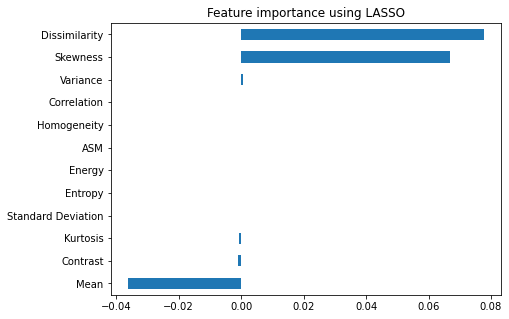

In [33]:
# Feature imoprtance - LASSO
# Librerias
from sklearn.linear_model import LassoCV
# feature importance
reg = LassoCV()
reg.fit(X, y)

print(f"Best alpha using built_in LassoCV: {reg.alpha_}")
print(f"Best score using built_in LassoCV: {reg.score(X,y)}")
coef = pd.Series(reg.coef_,index=data.columns[:-1])
#print(coef)

# features picked and eliminated
print("Lasso picked " + str(sum(coef != 0)) + " variables eliminated " + str(sum(coef == 0)))
#print(coef)

# Coeficientes
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize']=(7.0,5.0)
imp_coef.plot(kind='barh')
plt.title("Feature importance using LASSO")

### Eliminacion de atributos

In [34]:
# Nombres de los atributos y el target
nombres = ['Mean','Variance','Skewness','Contrast','Energy','Homogeneity','Dissimilarity','Correlation','Class']
# Se elimina algunas columnas
data_new = data.drop(['Standard Deviation','Entropy','Kurtosis','ASM'], axis=1)
data_new

,Mean,Variance,Skewness,Contrast,Energy,Homogeneity,Dissimilarity,Correlation,Class
0,6.54,619.59,4.28,98.61,0.29,0.53,4.47,0.98,0
1,8.75,805.96,3.72,63.86,0.48,0.65,3.22,0.99,0
2,7.34,1143.81,5.06,81.87,0.03,0.27,5.98,0.98,1
3,5.96,959.71,5.68,151.23,0.03,0.24,7.70,0.96,1
4,7.32,729.54,4.28,174.99,0.34,0.50,6.83,0.97,0
...,...,...,...,...,...,...,...,...,...
3757,21.23,1208.85,2.08,158.44,0.22,0.49,5.21,0.95,0
3758,20.44,1227.15,2.14,161.16,0.23,0.50,5.08,0.95,0
3759,18.01,1151.58,2.31,167.13,0.23,0.49,5.10,0.95,0
3760,13.33,945.73,2.73,223.81,0.26,0.48,6.44,0.94,0


## 2.3. Reduccion de dimensiones (PCA)

In [35]:
# Extraccion de caracteristicas con PCA
# Librerias
from sklearn.decomposition import PCA

# PCA con k=2
k=2
pca = PCA(n_components=k)
fit = pca.fit(X)
X_transform = pca.transform(X)
# Resumen de componentes
C = pca.components_
print(f"Explained Variance: {fit.explained_variance_ratio_}")
print(f"Components: {C}")
# Convertimos a dataframe
df_pca = pd.DataFrame(data=X_transform, columns = ['PC1','PC2'])
df_pca['Class'] = data.iloc[:,12]
df_pca

Explained Variance: [0.93681956 0.05225397]
Components: [[ 9.57601510e-03  9.98781322e-01  1.82940757e-02 -5.16953728e-05
  -1.90051745e-03 -3.00481631e-02  3.31975532e-02 -9.26324280e-05
  -4.24730712e-05 -7.95132794e-05  9.46915876e-04  1.60016630e-05]
 [-9.07141977e-03 -2.57592193e-02 -2.33596287e-03 -7.25418246e-05
   1.10377048e-02  2.17055176e-01  9.75630678e-01 -1.27574715e-04
  -5.92404538e-05 -3.05246805e-04  1.25929064e-02 -1.20738895e-04]]


,PC1,PC2,Class
0,-92.25,-27.44,0
1,92.96,-67.16,0
2,430.72,-55.64,1
3,248.88,18.33,1
4,20.15,44.30,0
...,...,...,...
3757,499.04,12.48,0
3758,517.40,14.72,0
3759,442.06,22.67,0
3760,238.17,83.82,0


## 2.4. Transformacion de la data

In [36]:
# Nombres de los atributos y el target
nombres = ['Mean','Variance','Standard Deviation','Entropy','Skewness','Kurtosis','Contrast','Energy',
           'ASM','Homogeneity','Dissimilarity','Correlation','Class']

### Escalamiento

In [37]:
# Data reescalada (entre 0 y 1) 
from sklearn.preprocessing import MinMaxScaler #StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()
data[nombres[0:-1]] = scaler.fit_transform(data[nombres[0:-1]])

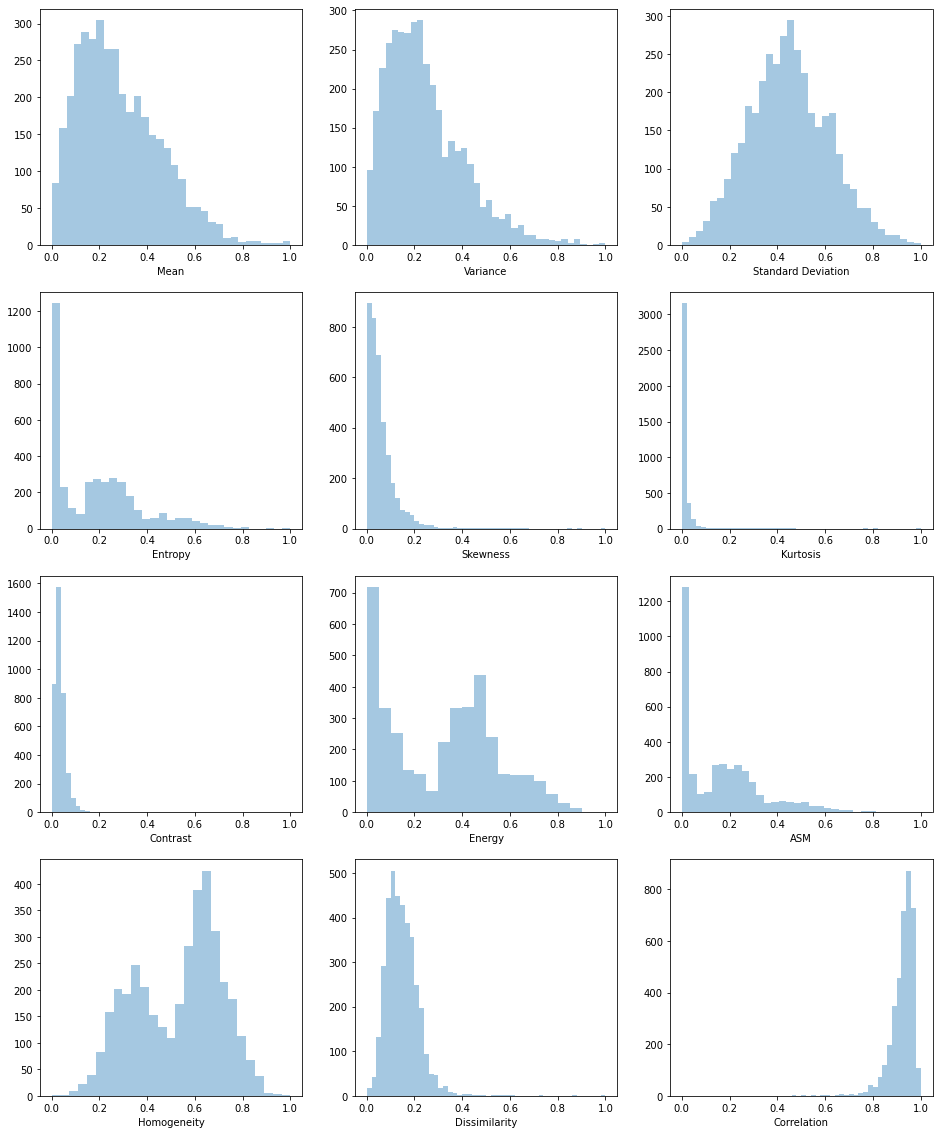

In [38]:
f, axes = plt.subplots(4, 3, figsize = (16,20), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        sns.distplot(data[nombres[n]], ax = axes[i,j], kde=False)
        n+=1
plt.show()

### Transformacion yeo-johnson

In [39]:
from sklearn.preprocessing import PowerTransformer

# Extraccion de caracteristicas con el bias
features = data[nombres[0:8]]
pt = PowerTransformer(method='yeo-johnson',standardize=True)

skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_
skl_boxcox = pt.transform(features)
df_features = pd.DataFrame(data = skl_boxcox, columns=nombres[0:8])
df_features

# Se pasa las caracteristicas transformadas al dataset original
for i in range(0,8):
    data.drop(nombres[i],axis=1,inplace=True)

df_data = pd.concat([df_features,data],axis=1)
cols = df_data.columns.tolist()

df_data = df_data[cols]

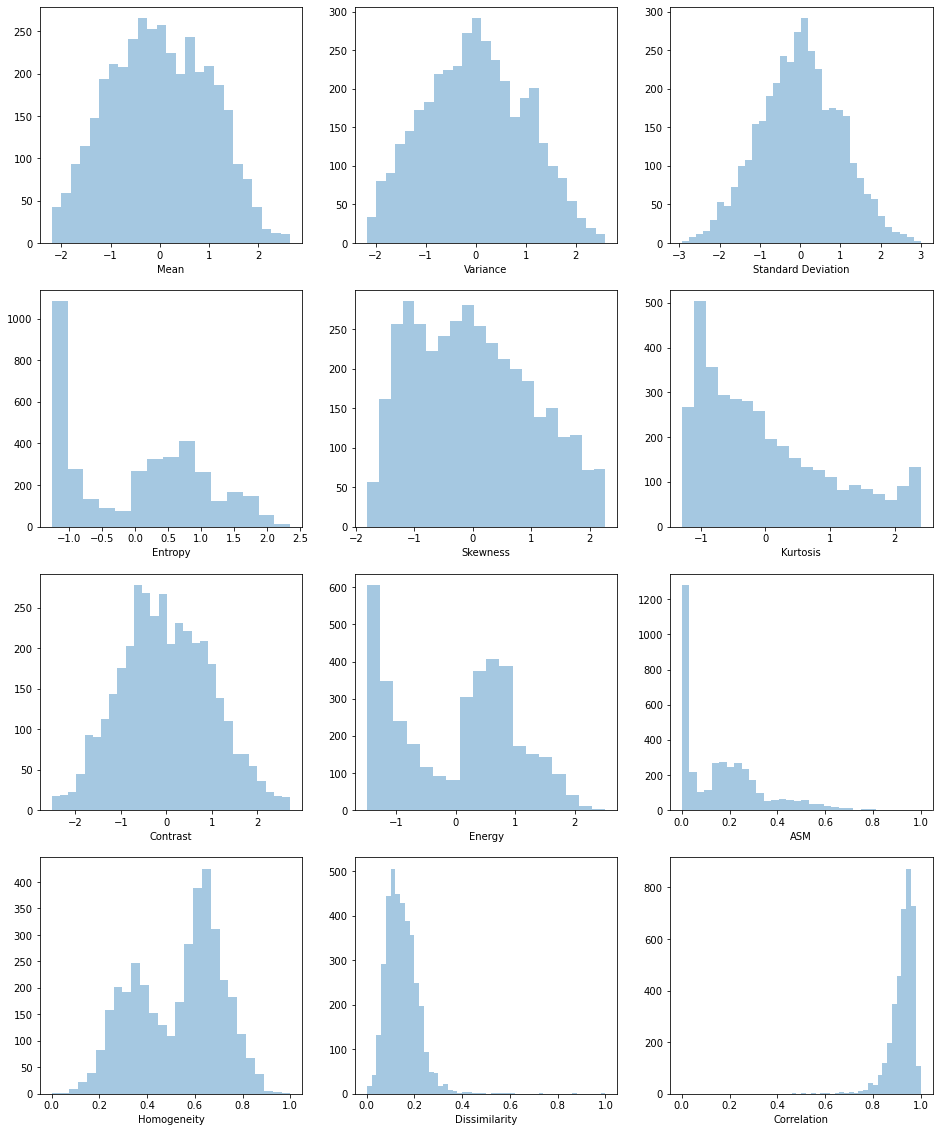

In [40]:
f, axes = plt.subplots(4, 3, figsize = (16,20), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        sns.distplot(df_data[nombres[n]], ax = axes[i,j], kde=False)
        n+=1
plt.show()

### Escalamiento

In [41]:
# Data reescalado (entre 0 y 1) 
from sklearn.preprocessing import MinMaxScaler #StandardScaler #Normalizer

scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler() #Normalizer()
df_data[nombres[0:-1]] = scaler.fit_transform(df_data[nombres[0:-1]])

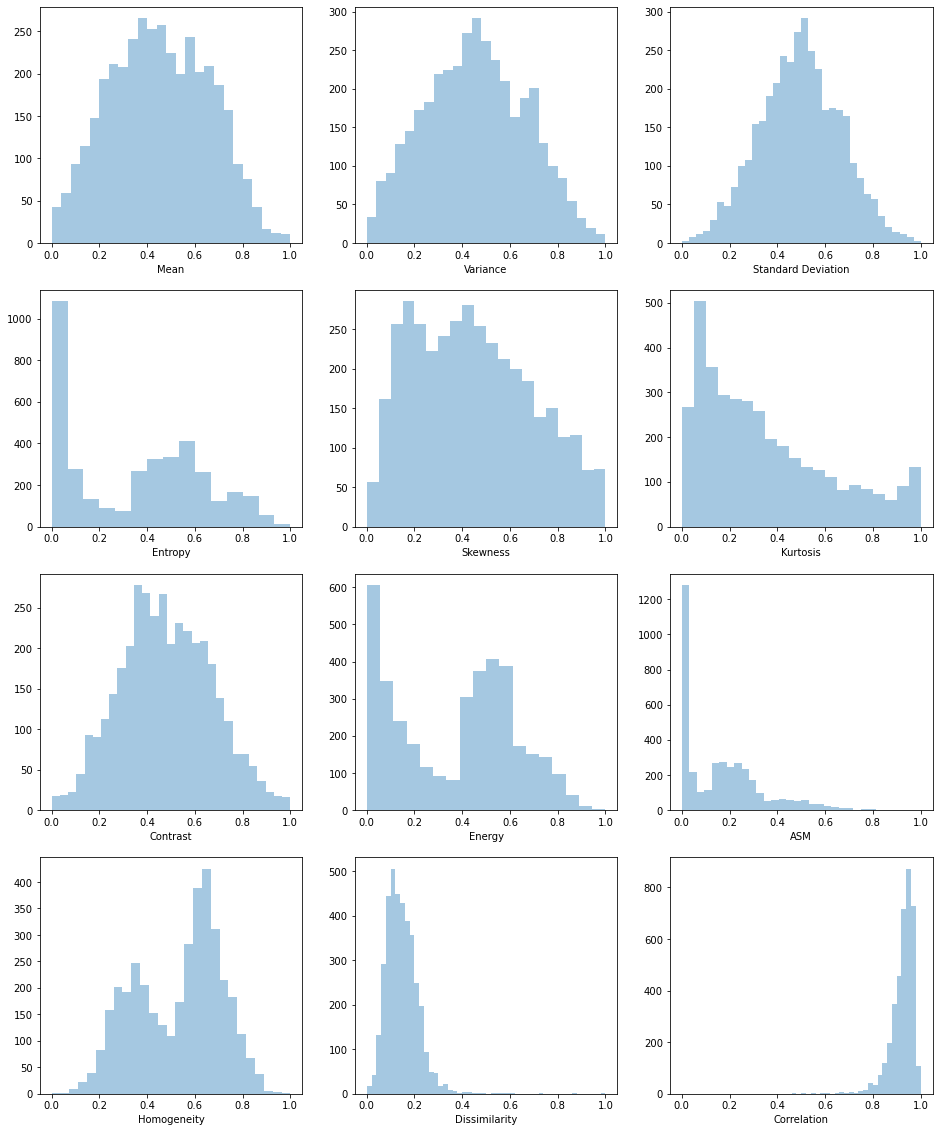

In [42]:
f, axes = plt.subplots(4, 3, figsize = (16,20), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        sns.distplot(df_data[nombres[n]], ax = axes[i,j], kde=False)
        n+=1
plt.show()

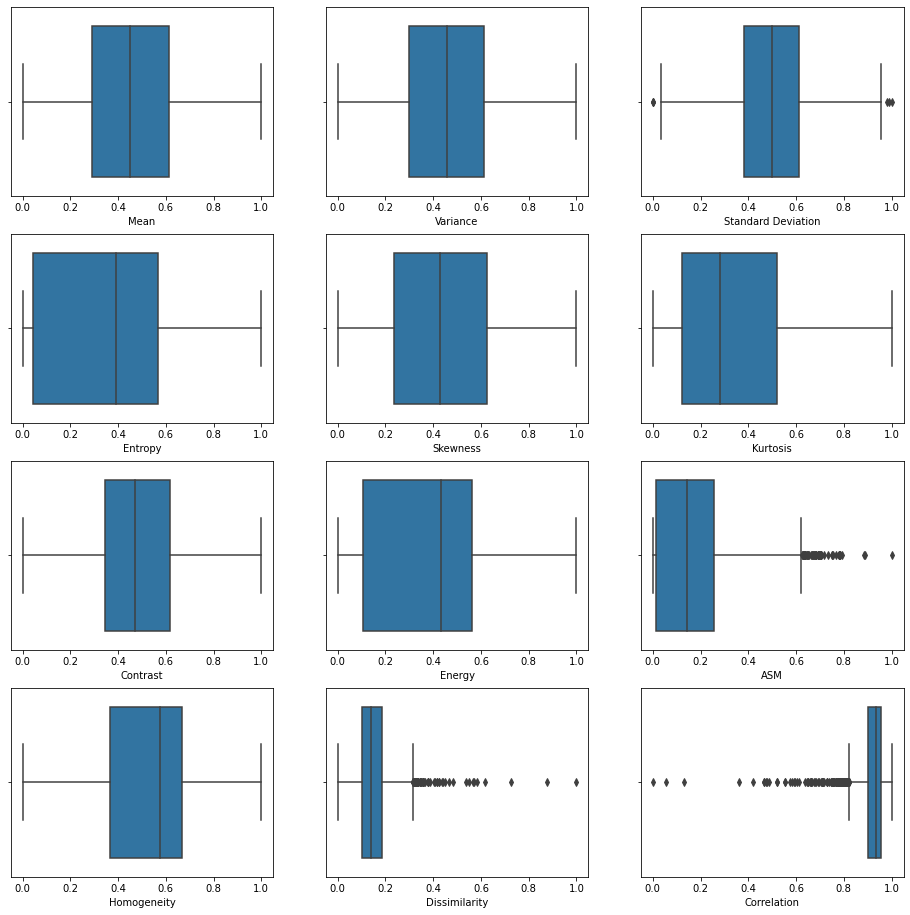

In [43]:
f, axes = plt.subplots(4, 3, figsize = (16,16), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        sns.boxplot(df_data[nombres[n]], ax = axes[i,j])
        n+=1
plt.show()

## 2.5. Eliminacion de valores atipicos

In [44]:
def find_anomalies(data):
    anomalies = []
    # Se establece el límite superior e inferior a 2 std
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std*2
    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])
    
    # Generar outliers
    for index, row in data.iterrows():
        outlier = row # obtener la primera columna
        # print(outlier)
        if(outlier.iloc[0]>upper_limit.iloc[0]) or (outlier.iloc[0]<lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

#find_anomalies(df_espanol.set_index('alpha_3')[['population']])

In [45]:
anomalias = find_anomalies(data[['Dissimilarity']])

0.011678488983399793
0.28429760612096705


# 3. Implementacion de algoritmos de Machine Learning

In [46]:
data = df_data # data escalado
#data = df_pca # data usando PCA

In [47]:
# Se separan las caracteristicas y el Target
X = np.array(data.drop(['Class'],1))
y = np.array(data['Class'])

In [48]:
# Se separa los datos en entrenamiento y prueba para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =123)

In [49]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00,  9.82it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.99,0.99,0.99,0.99,0.12
LGBMClassifier,0.99,0.99,0.99,0.99,0.14
XGBClassifier,0.99,0.99,0.99,0.99,0.21
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.18
RandomForestClassifier,0.99,0.99,0.99,0.99,0.37
AdaBoostClassifier,0.99,0.99,0.99,0.99,0.27
DecisionTreeClassifier,0.98,0.98,0.98,0.98,0.03
LabelPropagation,0.98,0.98,0.98,0.98,0.31
LabelSpreading,0.98,0.98,0.98,0.98,0.44


## 3.1. Algoritmos clasicos

In [50]:
# Regresion logistica
algoritmo = LogisticRegression(solver='lbfgs', max_iter=600)
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision Regresion Logistica (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision Regresion Logistica (test): {}".format(algoritmo.score(x_test, y_test)))

Precision Regresion Logistica (train): 0.9829092290163312
Precision Regresion Logistica (test): 0.9778565101860053


In [51]:
# Support Vector Machine
algoritmo = SVC(kernel='linear')
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision SVM (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision SVM (test): {}".format(algoritmo.score(x_test, y_test)))

Precision SVM (train): 0.9829092290163312
Precision SVM (test): 0.9805137289636847


In [52]:
# K neighbors
algoritmo = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision KNN (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision KNN (test): {}".format(algoritmo.score(x_test, y_test)))

Precision KNN (train): 0.9908849221420433
Precision KNN (test): 0.983170947741364


In [53]:
# Arboles de decision clasifiacion
algoritmo = DecisionTreeClassifier()
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision Decision Tree (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision Decision Tree (train): {}".format(algoritmo.score(x_test, y_test)))

Precision Decision Tree (train): 1.0
Precision Decision Tree (train): 0.9840566873339238


## 3.2. Algoritmos de Bagging

In [54]:
# Bagged Decision Trees for Classification
cart = DecisionTreeClassifier()
algoritmo = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision Bagged Decision Tree (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision Bagged Decision Tree (test): {}".format(algoritmo.score(x_test, y_test)))

Precision Bagged Decision Tree (train): 1.0
Precision Bagged Decision Tree (test): 0.9884853852967228


In [55]:
# RandomForest
algoritmo = RandomForestClassifier(n_estimators=10, criterion='entropy')
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision RandomForest (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision RandomForest (test): {}".format(algoritmo.score(x_test, y_test)))

Precision RandomForest (train): 0.9977212305355109
Precision RandomForest (test): 0.983170947741364


In [56]:
# Extra Trees Regression
algoritmo = ExtraTreesClassifier(n_estimators=100, max_features=3, random_state=7)
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision RandomForest (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision RandomForest (test): {}".format(algoritmo.score(x_test, y_test)))

Precision RandomForest (train): 1.0
Precision RandomForest (test): 0.9867139061116031


## 3.3. Algoritmos de Boosting

In [57]:
# AdaBoost for Classification
algoritmo = AdaBoostClassifier(n_estimators=30, random_state=7)
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision RandomForest (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision RandomForest (test): {}".format(algoritmo.score(x_test, y_test)))

Precision RandomForest (train): 0.9946828712495253
Precision RandomForest (test): 0.9840566873339238


In [58]:
# Gradient Boosting Machine for Classification
algoritmo = GradientBoostingClassifier(n_estimators=100, random_state=7)
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision RandomForest (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision RandomForest (test): {}".format(algoritmo.score(x_test, y_test)))

Precision RandomForest (train): 0.9996202050892518
Precision RandomForest (test): 0.9849424269264836


## 3.4. Comparacion de algoritmos

In [59]:
# Creacion de una lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('SVM', SVC(C=6, kernel='poly')))
models.append(('k-NN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=7)))
models.append(('RandomForest', RandomForestClassifier(n_estimators=10, criterion='entropy')))
models.append(('ExtraTrees', ExtraTreesClassifier(n_estimators=100, max_features=3, random_state=7)))
models.append(('Adaboost', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=7)))

# Evaluacion de cada modelo
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()*100.0:,.2f}% {cv_results.std()*100.0:,.2f}')

LR: 98.17% 0.86
SVM: 99.28% 0.39
k-NN: 98.75% 0.48
CART: 98.01% 0.83
Bagging: 98.67% 0.83
RandomForest: 98.72% 0.60
ExtraTrees: 98.94% 0.59
Adaboost: 98.70% 0.58
GradientBoosting: 98.72% 0.70


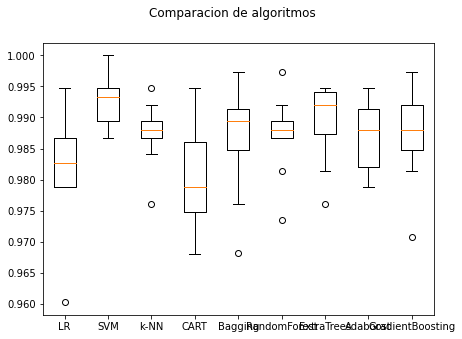

In [60]:
# boxplot de la comparacion de algoritmos
fig = plt.figure()
fig.suptitle('Comparacion de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 4. Optimizacion

### Algoritmo de SVM sin optimizar

In [61]:
# Support Vector Machine
algoritmo = SVC()
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision SVM (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision SVM (test): {}".format(algoritmo.score(x_test, y_test)))

Precision SVM (train): 0.984428408659324
Precision SVM (test): 0.9813994685562445


## 4.1. Grid Search

In [62]:
# Grid Search for Algorithm Tuning
c = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
kernel = np.array(['poly', 'rbf'])
param_grid = dict(C = c, kernel=kernel)
model = SVC()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X,y)
print(f"Mejor Accuracy: {grid.best_score_.mean()*100.0:,.2f} %")
print(f"Mejor C para mejor Accuracy: {grid.best_estimator_.C}")
print(f"Mejor kernel para mejor Accuracy: {grid.best_estimator_.kernel}")

Mejor Accuracy: 99.20 %
Mejor C para mejor Accuracy: 6.0
Mejor kernel para mejor Accuracy: poly


## 4.2. Random Search

In [63]:
# Random Search for Algorithm Tuning
param_random = {'C': uniform(1,50)}
model = SVC()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_random, n_iter=50, random_state=7, cv=5)
rsearch.fit(X,y)

print(f"Mejor Accuracy: {rsearch.best_score_.mean()*100.0:,.2f} %")
print(f"Mejor C para mejor Accuracy: {rsearch.best_estimator_.C}")

Mejor Accuracy: 99.39 %
Mejor C para mejor Accuracy: 39.99593961200573


### Algoritmo de SVM optimizado

In [64]:
# Support Vector Machine
algoritmo = SVC(C=6, kernel='poly')
algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print("Precision SVM (train): {}".format(algoritmo.score(x_train, y_train)))
print("Precision SVM (test): {}".format(algoritmo.score(x_test, y_test)))

Precision SVM (train): 0.994303076338777
Precision SVM (test): 0.9902568644818424


## 4.3. Metricas

In [65]:
# Grafica de la matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusion:")
print(matriz)

Matriz de Confusion:
[[632   2]
 [  9 486]]


In [66]:
# Calculo de la precision del modelo 
precision = precision_score(y_test, y_pred)
print("Precision del mdelo:")
print(precision)

Precision del mdelo:
0.9959016393442623


In [67]:
# Calculo de la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.9902568644818424


In [68]:
# Calculo de la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad del modelo:")
print(sensibilidad)

Sensibilidad del modelo:
0.9818181818181818


In [69]:
# Calculo de el puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred)
print("Puntaje F1 del modelo:")
print(puntajef1)

Puntaje F1 del modelo:
0.9888097660223804


In [70]:
# Calculo de la curva ROC - AUC del modelo
roc_auc = roc_auc_score(y_test, y_pred)
print("Curva ROC - AUC del modelo:")
print(roc_auc)

Curva ROC - AUC del modelo:
0.9893318038428449


In [71]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen cappa score del modelo:")
print(kappa)

Cohen cappa score del modelo:
0.980183089804001


# 5. Forecasting

In [72]:
import pickle as pkl
import joblib as jbl

## 5.1. Pickle

In [73]:
model = SVC(C=6, kernel='poly')
model.fit(x_train, y_train)

# Se guarda el modelo
filename = 'modelos de IA entrenados/IA_modelo_pkl.sav'
pkl.dump(model, open(filename, 'wb'))

In [74]:
# Se carga el modelo guardado
loaded_model = pkl.load(open(filename, 'rb'))
results = loaded_model.score(x_test, y_test)
print(f"Accuracy: {results.mean()}")

Accuracy: 0.9902568644818424


## 5.1. Joblib

In [75]:
model = SVC(C=6, kernel='poly')
model.fit(x_train, y_train)

# Se guarda el modelo
filename = 'modelos de IA entrenados/IA_modelo_jbl.sav'
jbl.dump(model, filename)

['modelos de IA entrenados/IA_modelo_jbl.sav']

In [76]:
# Se carga el modelo guardado
loaded_model = jbl.load(filename)
results = loaded_model.score(x_test, y_test)
print(f"Accuracy: {results.mean()}")

Accuracy: 0.9902568644818424
